In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import statsmodels.api as sm
pd.options.display.max_rows = 20
np.set_printoptions(precision = 4, suppress = True)

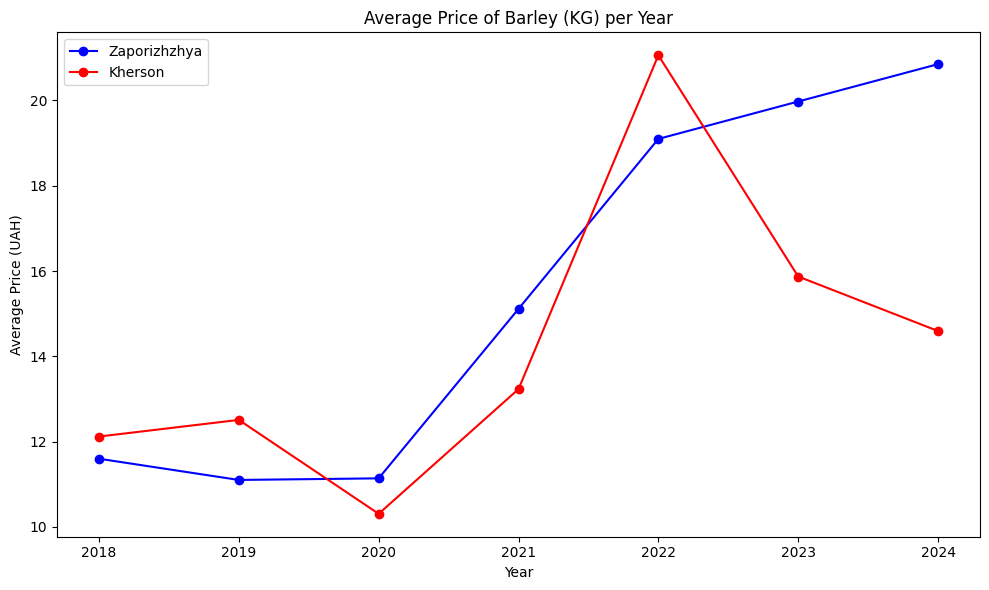

In [109]:
df = pd.read_csv("wfp_food_prices_ukr.csv", low_memory=False)

df['date'] = pd.to_datetime(df['date'], errors='coerce', format='%Y-%m-%d')

def calculate_yearly_avg(data, market_name):
    filtered_df = data[
        (data['market'] == market_name) &
        (data['category'] == 'cereals and tubers') &
        (data['commodity'] == 'Barley') &
        (data['unit'] == 'KG') &
        (data['priceflag'] == 'actual') &
        (data['pricetype'] == 'Retail')
    ]
    filtered_df = filtered_df.dropna(subset=['date'])
    filtered_df['price'] = pd.to_numeric(filtered_df['price'], errors='coerce')
    filtered_df = filtered_df.dropna(subset=['price'])
    filtered_df['year'] = filtered_df['date'].dt.year
    yearly_avg = filtered_df.groupby('year')['price'].mean().reset_index()
    return yearly_avg

zaporizhzhya_avg = calculate_yearly_avg(df, 'Zaporizhzhya')
kherson_avg = calculate_yearly_avg(df, 'Kherson')

plt.figure(figsize=(10, 6))
plt.plot(zaporizhzhya_avg['year'], zaporizhzhya_avg['price'], marker='o', color='b', label='Zaporizhzhya')
plt.plot(kherson_avg['year'], kherson_avg['price'], marker='o', color='r', label='Kherson')

plt.xlabel('Year')
plt.ylabel('Average Price (UAH)')
plt.title('Average Price of Barley (KG) per Year')

plt.legend()

plt.tight_layout()
plt.show()

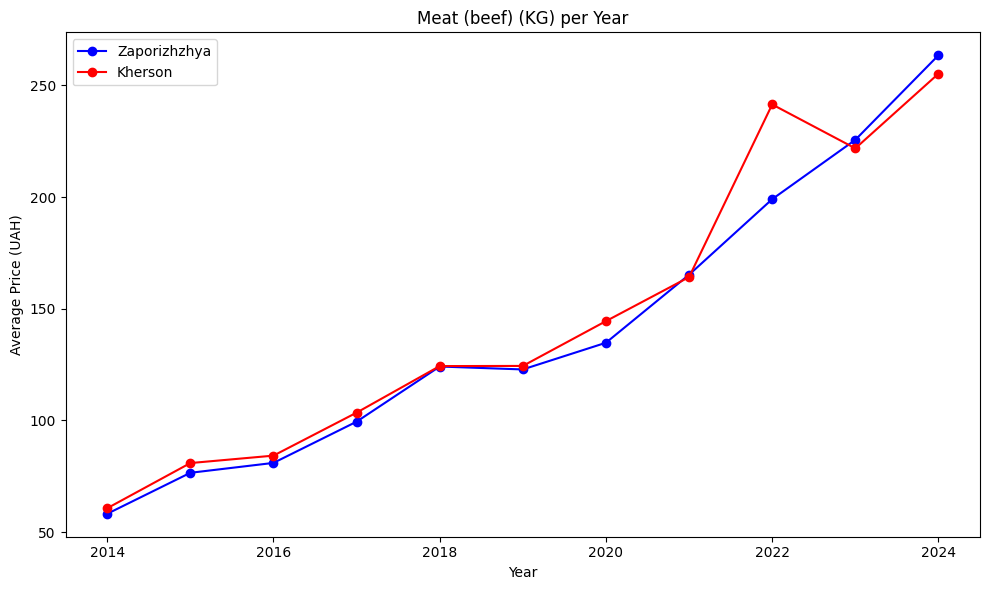

In [110]:
df = pd.read_csv("wfp_food_prices_ukr.csv", low_memory=False)

df['date'] = pd.to_datetime(df['date'], errors='coerce', format='%Y-%m-%d')

def calculate_yearly_avg(data, market_name):
    filtered_df = data[
        (data['market'] == market_name) &
        (data['category'] == 'meat, fish and eggs') &
        (data['commodity'] == 'Meat (beef)') &
        (data['unit'] == 'KG') &
        (data['priceflag'] == 'actual') &
        (data['pricetype'] == 'Retail')
    ]
    filtered_df = filtered_df.dropna(subset=['date'])
    filtered_df['price'] = pd.to_numeric(filtered_df['price'], errors='coerce')
    filtered_df = filtered_df.dropna(subset=['price'])
    filtered_df['year'] = filtered_df['date'].dt.year
    yearly_avg = filtered_df.groupby('year')['price'].mean().reset_index()
    return yearly_avg

zaporizhzhya_avg = calculate_yearly_avg(df, 'Zaporizhzhya')
kherson_avg = calculate_yearly_avg(df, 'Kherson')

plt.figure(figsize=(10, 6))
plt.plot(zaporizhzhya_avg['year'], zaporizhzhya_avg['price'], marker='o', color='b', label='Zaporizhzhya')
plt.plot(kherson_avg['year'], kherson_avg['price'], marker='o', color='r', label='Kherson')

plt.xlabel('Year')
plt.ylabel('Average Price (UAH)')
plt.title('Meat (beef) (KG) per Year')

plt.legend()

plt.tight_layout()
plt.show()